## Importing dataset from SQL

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# using pandas to read the dataset in
df = pd.read_csv("/Users/dominiclai/Documents/Documents - Dominic’s MacBook Pro/Portfolio - Projects/top_uk_instagrammers_2024 (Excel_SQL_Python Project)/datasets/uk_instagrammers_2024_complete.csv")

In [3]:
# .head() to glance into the first x rows to double check the data is what we're expecting
df.head(10)

,full_name,followers,following,posts,engagement_rate_percent,potential_reach_per_million
0,David Beckham,88348986.0,622.0,1905.0,0.64,26.1
1,Emma Watson,74323234.0,119.0,450.0,1.41,22.6
2,Tom Holland,65111673.0,326.0,1261.0,4.52,19.9
3,Millie Bobby Brown,63458434.0,869.0,509.0,0.02,19.0
4,Adele,57578034.0,1.0,495.0,4.14,16.8
5,Zayn Malik,51872538.0,13.0,40.0,5.09,15.7
6,Ed Sheeran,47886518.0,4.0,2400.0,0.81,14.1
7,Liverpool Football Club,45626236.0,296.0,28157.0,0.39,13.3
8,Cara Delevingne,41332321.0,1380.0,2869.0,0.55,12.6
9,Jason Statham,42393492.0,0.0,350.0,2.40,12.2


<br>

# Convert followers column to followers_per_million

In [4]:
df['followers_per_million'] = df['followers']/1000000
df['followers_per_million'] = df['followers_per_million'].round(2)

In [5]:
df.head(10)

,full_name,followers,following,posts,engagement_rate_percent,potential_reach_per_million,followers_per_million
0,David Beckham,88348986.0,622.0,1905.0,0.64,26.1,88.35
1,Emma Watson,74323234.0,119.0,450.0,1.41,22.6,74.32
2,Tom Holland,65111673.0,326.0,1261.0,4.52,19.9,65.11
3,Millie Bobby Brown,63458434.0,869.0,509.0,0.02,19.0,63.46
4,Adele,57578034.0,1.0,495.0,4.14,16.8,57.58
5,Zayn Malik,51872538.0,13.0,40.0,5.09,15.7,51.87
6,Ed Sheeran,47886518.0,4.0,2400.0,0.81,14.1,47.89
7,Liverpool Football Club,45626236.0,296.0,28157.0,0.39,13.3,45.63
8,Cara Delevingne,41332321.0,1380.0,2869.0,0.55,12.6,41.33
9,Jason Statham,42393492.0,0.0,350.0,2.40,12.2,42.39


<br>

## Quick information

.info() and .describe() allows us to grab quick insightful information about our dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   full_name                    100 non-null    object 
 1   followers                    99 non-null     float64
 2   following                    99 non-null     float64
 3   posts                        99 non-null     float64
 4   engagement_rate_percent      100 non-null    float64
 5   potential_reach_per_million  100 non-null    float64
 6   followers_per_million        99 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [7]:
df.describe()

,followers,following,posts,engagement_rate_percent,potential_reach_per_million,followers_per_million
count,9.900000e+01,99.000000,99.000000,100.000000,100.000000,99.000000
mean,1.622061e+07,1115.010101,2329.212121,3.123800,4.756000,16.220707
std,1.607210e+07,1635.974455,4420.503299,4.375383,4.784135,16.072101
min,5.092727e+06,0.000000,21.000000,0.020000,1.500000,5.090000
25%,6.699554e+06,221.000000,444.000000,0.615000,1.975000,6.700000
50%,1.056894e+07,608.000000,985.000000,1.270000,2.900000,10.570000
75%,1.709756e+07,1231.500000,2062.000000,3.937500,4.825000,17.095000
max,8.834899e+07,7464.000000,28157.000000,28.600000,26.100000,88.350000


<br>

## Creating Totals Row

In [8]:
pd.options.display.float_format = '{:.0f}'.format

# summing required features
filter1 = ['followers_per_million', 'following', 'posts', 'potential_reach_per_million']
totals = df[filter1].sum()

# convert series to dataframe and transpose it into row
totals_row = pd.DataFrame(totals).T

totals_row.index = ['Totals']
totals_row

,followers_per_million,following,posts,potential_reach_per_million
Totals,1606,110386,230592,476


In [9]:
# appending totals row to table

filter2 = ['full_name', 'followers_per_million', 'following', 'posts', 'potential_reach_per_million']
df_filter2 = df[filter2]

totals_row['full_name'] = 'Totals'
totals_row.index = [100]

df_with_totals = pd.concat([df_filter2, totals_row])

df_with_totals.reset_index(drop=True, inplace=True)
df_with_totals

,full_name,followers_per_million,following,posts,potential_reach_per_million
0,David Beckham,88,622,1905,26
1,Emma Watson,74,119,450,23
2,Tom Holland,65,326,1261,20
3,Millie Bobby Brown,63,869,509,19
4,Adele,58,1,495,17
...,...,...,...,...,...
96,Alex Oxladechamberlain,5,501,907,2
97,Luke Shaw,5,219,310,2
98,Ranjit Bawa,5,0,1541,2
99,,5,1706,162,2


In [10]:
# highlighting totals row

def highlight_totals(row):
    if row.name == 100:
        return['background-color: lightblue']*len(row)
    return['']*len(row)

df_totals_highlight = df_with_totals.style.apply(highlight_totals, axis=1)
df_totals_highlight

,full_name,followers_per_million,following,posts,potential_reach_per_million
0,David Beckham,88.350000,622.000000,1905.000000,26.100000
1,Emma Watson,74.320000,119.000000,450.000000,22.600000
2,Tom Holland,65.110000,326.000000,1261.000000,19.900000
3,Millie Bobby Brown,63.460000,869.000000,509.000000,19.000000
4,Adele,57.580000,1.000000,495.000000,16.800000
5,Zayn Malik,51.870000,13.000000,40.000000,15.700000
6,Ed Sheeran,47.890000,4.000000,2400.000000,14.100000
7,Liverpool Football Club,45.630000,296.000000,28157.000000,13.300000
8,Cara Delevingne,41.330000,1380.000000,2869.000000,12.600000
9,Jason Statham,42.390000,0.000000,350.000000,12.200000


<br>

# Potential Reach Per Post

In [11]:
sum_of_potential_reach_per_m = df['potential_reach_per_million'].sum()
sum_of_posts = df['posts'].sum()

print("sum of potential reach (M) = " + str(sum_of_potential_reach_per_m) + ' M')
print("sum of posts = " + str(sum_of_posts))

print("\n")

avg_potential_reach_m_per_post = sum_of_potential_reach_per_m / sum_of_posts
print("average potential reach (M) per post = " + str(avg_potential_reach_m_per_post) + ' M')

avg_potential_reach_per_post = avg_potential_reach_m_per_post * 1000000
avg_potential_reach_per_post = avg_potential_reach_per_post.round()
print("average potential reach per post = " + str(avg_potential_reach_per_post) + ' people')

sum of potential reach (M) = 475.59999999999997 M
sum of posts = 230592.0


average potential reach (M) per post = 0.0020625173466555648 M
average potential reach per post = 2063.0 people


<br>

# Follower Engagement Rate

Engagement Rate = The level of interaction that the influencer's content receives from users on social media platforms, expressed as a percentage.

In [12]:
# follower engagement rate
# average followers per post

sum_of_followers = df['followers'].sum()
sum_of_posts = df['posts'].sum()

print("sum of followers = " + str(sum_of_followers))
print("sum of posts = " + str(sum_of_posts))

print("\n")

avg_follower_engagement_rate = sum_of_followers / sum_of_posts
avg_follower_engagement_rate = avg_follower_engagement_rate.round()
print("average followers gained per post or 'Engagement Rate' = " + str(avg_follower_engagement_rate) + ' people')

sum of followers = 1605840009.0
sum of posts = 230592.0


average followers gained per post or 'Engagement Rate' = 6964.0 people


<br>

# Posts per Followers

In [13]:
# on average, instagram post rate per followers gained
sum_of_posts = df['posts'].sum()
sum_of_followers = df['followers'].sum()

print("sum of posts = " + str(sum_of_posts))
print("sum of followers = " + str(sum_of_followers))

sum_of_followers_m = sum_of_followers / 1000000
print("sum of followers (M) = " + str(sum_of_followers_m) + ' M')

print("\n")

avg_posts_per_million_followers = sum_of_posts / sum_of_followers_m
avg_posts_per_million_followers = avg_posts_per_million_followers.round()
print("average no. of posts per million followers = " + str(avg_posts_per_million_followers) + ' posts')

sum of posts = 230592.0
sum of followers = 1605840009.0
sum of followers (M) = 1605.840009 M


average no. of posts per million followers = 144.0 posts


<br>

# Data Visualisation

In [14]:
# importing necessary libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

## Top 10 Instagram Accounts by Followers

In [15]:
# sort followers in desc order, limit top 10
df_top10 = df.sort_values('followers_per_million', ascending=False).head(10)

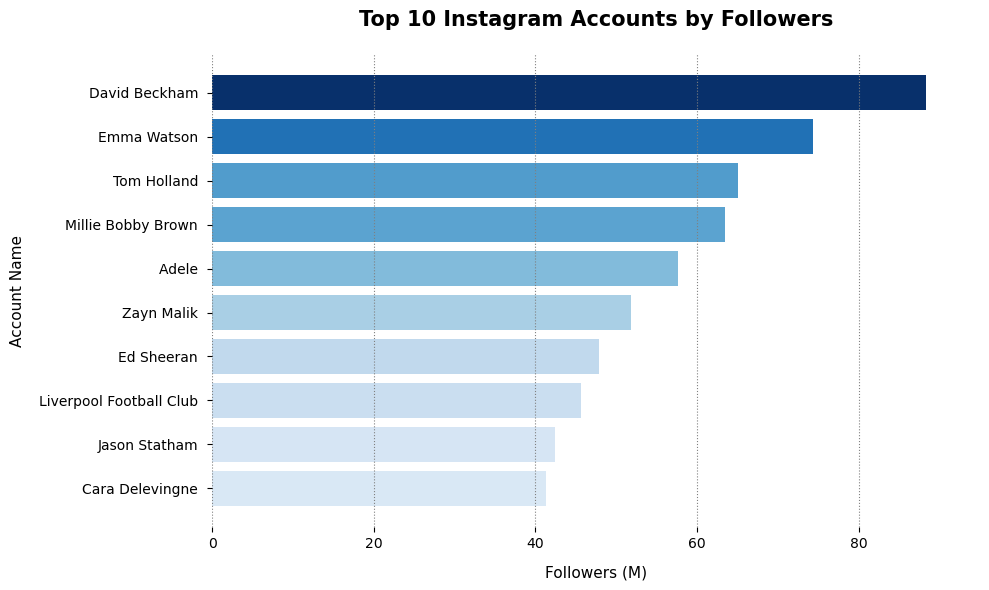

In [16]:
# create the plot
fig, ax = plt.subplots(figsize=(10,6))

# creating blue gradient
import matplotlib.colors as mcolors
norm = plt.Normalize(df_top10['followers_per_million'].min() * 0.8, df_top10['followers_per_million'].max())
colors = plt.cm.Blues(norm(df_top10['followers_per_million']))

# get the position for each account name
y_pos = np.arange(len(df_top10['full_name']))

# create horizontal bar chart
ax.barh(df_top10['full_name'], df_top10['followers_per_million'], align='center', color=colors)

# invert the y-axis so that order goes from largest to smallest
ax.invert_yaxis()

# creating dotted lines on x-axis, at every 20(M) interval
ax.set_xticks(np.arange(0, df_top10['followers_per_million'].max()+20, step=20))
ax.grid(True, axis='x', linestyle=':', color='gray', linewidth=0.8)

# limiting x-axis
ax.set_xlim([0,95])

# lables and title
plt.xlabel('Followers (M)',  fontsize=11)
plt.ylabel('Account Name', fontsize=11)
plt.title('Top 10 Instagram Accounts by Followers', fontsize=15, fontweight='bold', pad=20)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10

# set font size for tick labels
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

# remove spines from plot
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

<br>

## Top 10 Accounts: Potential Reach VS Followers (Bubble size = Engagement Rate)

In [17]:
# Sort the data by top potential reach, to get the 10 leading accounts for this field
top_10 = df.sort_values(by='potential_reach_per_million', ascending=False).head(10)

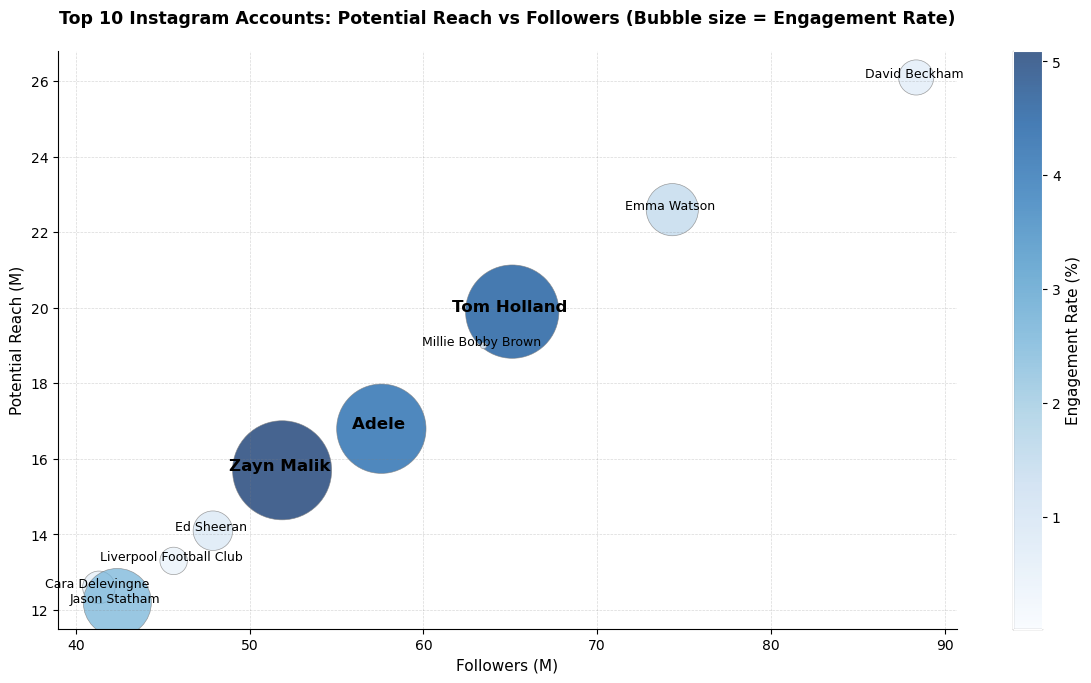

In [18]:
import matplotlib.patheffects as path_effects

# Prepare the data
followers = top_10['followers_per_million']
potential_reach = top_10['potential_reach_per_million']
engagement_rate = top_10['engagement_rate_percent']
names = top_10['full_name']

# Set the figure size
plt.figure(figsize=(14.5, 7.5))

# Create the bubble plot
plt.scatter(x=followers, y=potential_reach, s=engagement_rate * 1000, alpha=0.75, c=engagement_rate, cmap='Blues', edgecolor='grey', linewidth=0.5)

# Add colour bar for engagement rate
cbar = plt.colorbar(label='Engagement Rate (%)')

# Customise colour bar
cbar.set_label('Engagement Rate (%)', fontsize=11)
cbar.ax.tick_params(labelsize=10)  # Make the ticks more readable
cbar.outline.set_color('white')

# Highlight the top 3 accounts with the highest engagement rates by changing label color and size
top_3_indices = engagement_rate.nlargest(3).index
for i, name in enumerate(names):
    if i in top_3_indices:
        text = plt.text(followers.iloc[i], potential_reach.iloc[i], name, fontsize=12, ha='center', fontweight='bold', color='black')
        # text.set_path_effects([path_effects.Stroke(linewidth=1, foreground='blue'), path_effects.Normal()])
    else:
        plt.text(followers.iloc[i], potential_reach.iloc[i], name, fontsize=9, ha='center', color='black')

# Add labels and title
plt.title('Top 10 Instagram Accounts: Potential Reach vs Followers (Bubble size = Engagement Rate)', fontsize=12.5, fontweight='bold', pad=20)
plt.xlabel('Followers (M)', fontsize=11)
plt.ylabel('Potential Reach (M)', fontsize=11)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10

# remove spines from plot
sns.despine()

plt.grid(True, which='both', axis='both', color='grey', linestyle='--', linewidth=0.5, alpha=0.3)

# Show the plot
plt.show()

<br>

In [19]:
df['followers_m'] = df['followers'] / 1000000

df['posts_per_million_followers'] = df['posts'] / df['followers_m']


df=df.sort_values('posts_per_million_followers', ascending=False)
df

,full_name,followers,following,posts,engagement_rate_percent,potential_reach_per_million,followers_per_million,followers_m,posts_per_million_followers
91,Vicky Pattison,5522456,7400,10785,0,2,6,6,1953
24,Tottenham Hotspur,17092409,312,21013,0,5,17,17,1229
42,Mercedesamg Petronas F Team,13557288,47,15585,0,3,14,14,1150
79,Sean Garnier World Champion,6102384,3065,5762,3,2,6,6,944
95,Adnan Alkateb,5775620,730,4842,1,2,6,6,838
...,...,...,...,...,...,...,...,...,...
41,Tom Hiddleston,10699381,112,52,8,3,11,11,5
64,Hero Fiennes Tiffin,7216612,1096,27,10,2,7,7,4
15,Liam Payne,26248371,256,21,4,8,26,26,1
5,Zayn Malik,51872538,13,40,5,16,52,52,1
